<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>


# <center>NLP Using CNN</center>

## Table of Contents

1. [Making a case for CNNs to use in NLP](#section1)
  - 1.1 [Sequence Processing with Convnets](#section101)<br><br>
  - 1.2 [Understanding 1D convolution for sequence data](#section102)<br><br>
2. [Using CNN for Sentiment Analysis](#section2)
  - 2.1 [Preparing the IMDB data](#section201)<br><br>
  - 2.2 [Training and Evaluating a Simple 1D Convnet on the IMDB Data](#section202)<br><br>
3. [Combining CNNs and RNNs to process Long Sequences](#section3)
  - 3.1 [Model combining a 1D Convolutional Base and a GRU Layer](#section301)<br><br>
4. [Conclusion](#section4)

<a id=section1></a>
## 1. Making a case for CNNs to use in NLP

<a id=section101></a>
### 1.1 Sequence Processing with Convnets

In the **Computer Vision** modules, you learned about **convolutional neural networks** (*convnets*) and how they perform particularly well on computer vision problems.

  - Due to their ability to operate **convolutionally**, extracting features from local input patches.
  
  - Allowing for **representation modularity** and **data efficiency**. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/conv_operation.png"/></center>

<br> 
The same properties that make convnets excel at computer vision also make them highly relevant to **sequence processing**. 

<br> 

---

- **Time** can be treated as a **spatial dimension**, like the height or width of a 2D image. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_conv_operation.png"/></center>

<br>

- Such **1D convnets** can be competitive with RNNs on certain **sequence-processing problems**, usually at a considerably **cheaper computational cost**. 

- Small 1D convnets can offer a **fast alternative** to **RNNs** for simple tasks such as **text classification** and **timeseries forecasting**.

<a id=section102></a>
### 1.2 Understanding 1D convolution for sequence data

- The convolution layers introduced previously were **2D convolutions**, extracting 2D patches from image tensors and applying an identical transformation to every patch. 

- In the same way, you can use **1D convolutions**, extracting local 1D patches (subsequences) from sequences.

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_conv_working.jpg"/></center>

- Such 1D convolution layers can **recognize local patterns** in a sequence. 

- Because the same input transformation is performed on every patch, a pattern learned at a certain position in a sentence can later be recognized at a different position, making **1D convnets translation invariant** (for temporal translations). 

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/translation_invariant.png"/></center>
<center><strong>Translation Invariance</strong></center>

<br> 

---

- For instance, a 1D convnet processing sequences of characters using convolution windows of **size 5** should be able to learn words or **word fragments** of length 5 or less, and it should be able to recognize these words in any context in an **input sequence**. 

- A **character-level 1D convnet** is thus able to learn about **word morphology**.

<br>

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_conv_working.png"/></center>

<br>

**1D pooling for sequence data**

- You’re already familiar with 2D pooling operations, such as **2D average pooling** and **max pooling**, used in convnets to **spatially downsample image tensors**. 

- The 2D **pooling** operation has a **1D** equivalent: *extracting 1D patches* (*subsequences*) from an input and *outputting* the maximum value (*max pooling*) or average value (*average pooling*). 

- Just as with 2D convnets, this is used for **reducing** the **length** of **1D inputs** (*subsampling*).

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_global_max_pooling.png" width="700" height="300"/></center>

<a id=section2></a>
## 2. Using CNN for Sentiment Analysis

- In Keras, you use a 1D convnet via the **Conv1D** layer, which has an interface similar to Conv2D. 

- It takes as **input** 3D tensors with shape *(samples, time, features)* and **returns** similarly shaped 3D tensors. 

- The **convolution window** is a **1D** window on the **temporal axis**: axis 1 in the input tensor.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_cnn_vector.jpg"/></center>

<br> 
- Let’s build a simple two-layer 1D convnet and apply it to the **IMDB sentiment classification** task.

<a id=section201></a>
### 2.1 Preparing the IMDB data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_features = 10000
max_len = 500

- **Loading** the **dataset**.

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


- **Padding** the **sequences**.

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


<br> 
**1D convnets** are structured in the same way as their 2D counterparts: 

- They consist of a **stack** of **Conv1D** and **MaxPooling1D** layers.


- Ending in either a **global pooling** layer or a **Flatten** layer, that turn the 3D outputs into 2D outputs.


- Allowing you to add one or more **Dense** layers to the model for **classification** or **regression**.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_convnet_architecture.png"/></center>

<br> 

---

- One difference, though, is the fact that you can afford to **use larger convolution windows** with 1D convnets. 


- With a 2D convolution layer, a 3 × 3 convolution window contains 3 × 3 = 9 feature vectors; but with a *1D convolution layer*, a **convolution window** of **size 3** contains only **3** feature vectors. 


- You can thus easily afford **1D convolution windows** of **size 7 or 9**.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/1d_filter.gif"/></center>

<a id=section202></a>
### 2.2 Training and Evaluating a Simple 1D Convnet on the IMDB Data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam

- **Building** the **model**.

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

In [ ]:
# Compiling the model.
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

- **Fitting** the **model**.

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 3s 170us/sample - loss: 0.7454 - acc: 0.5060 - val_loss: 0.6904 - val_acc: 0.5352
Epoch 2/30
20000/20000 [==============================] - 3s 139us/sample - loss: 0.6766 - acc: 0.6375 - val_loss: 0.6811 - val_acc: 0.6048
Epoch 3/30
20000/20000 [==============================] - 3s 140us/sample - loss: 0.6570 - acc: 0.7262 - val_loss: 0.6690 - val_acc: 0.6566
Epoch 4/30
20000/20000 [==============================] - 3s 138us/sample - loss: 0.6327 - acc: 0.7929 - val_loss: 0.6494 - val_acc: 0.6820
Epoch 5/30
20000/20000 [==============================] - 3s 139us/sample - loss: 0.5982 - acc: 0.8171 - val_loss: 0.6108 - val_acc: 0.7548
Epoch 6/30
20000/20000 [==============================] - 3s 139us/sample - loss: 0.5401 - acc: 0.8445 - val_loss: 0.5353 - val_acc: 0.7848
Epoch 7/30
20000/20000 [==============================] - 3s 139us/sample - loss: 0.4420 - acc: 0.8527 - val_lo

In [ ]:
print('Training Accuracy on last epoch =', history.history['acc'][-1])
print('Validation Accuracy on last epoch =', history.history['val_acc'][-1])
print('Peak Training Accuracy =', max(history.history['acc']))
print('Peak Validation Accuracy =', max(history.history['val_acc']))

Training Accuracy on last epoch = 0.99845
Validation Accuracy on last epoch = 0.867
Peak Training Accuracy = 0.99845
Peak Validation Accuracy = 0.8752


In [ ]:
print('Training Loss on last epoch =', history.history['loss'][-1])
print('Validation Loss on last epoch =', history.history['val_loss'][-1])
print('Lowest Training Loss =', min(history.history['loss']))
print('Lowest Validation Loss =', min(history.history['val_loss']))

Training Loss on last epoch = 0.026849224854260684
Validation Loss on last epoch = 0.790881962776184
Lowest Training Loss = 0.026849224854260684
Lowest Validation Loss = 0.402612374830246


- Plotting **training** and **validation accuracy against epochs**.

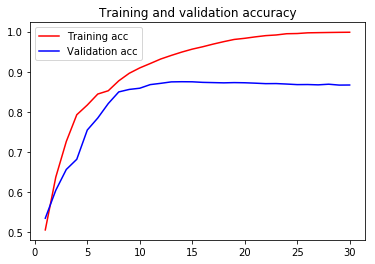

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

- Plotting **training** and **validation loss against epochs.**.

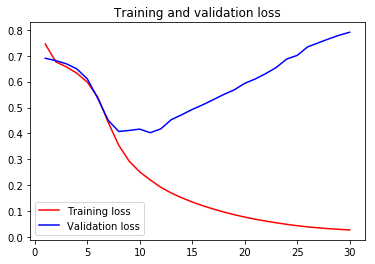

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

- **Validation accuracy** is somewhat **less than** that of the **Bidirectional LSTM**, but **runtime** is **faster** on both CPU and GPU (the exact increase in speed will vary greatly depending on your exact configuration). 


- At this point, you could **retrain** this model for the **right number of epochs** (fifteen) and **run** it on the **test set**. 


- This is a convincing demonstration that a **1D convnet** can offer a **fast, cheap** alternative to a recurrent network on a word-level sentiment-classification task.

- **Create** a `weights` directory if not already present.

In [ ]:
!mkdir weights

- **Saving** the **model**.

In [ ]:
# Saving model
model.save('weights/1d_cnn.h5')

<a id=section3></a>
## 3. Combining CNNs and RNNs to process Long Sequences

- Because 1D convnets process input patches independently, they **aren’t sensitive** to the **order of** the **timesteps** (beyond a local scale, the size of the convolution windows), unlike RNNs. 


- Of course, to **recognize longer-term patterns**, you can **stack many** convolution **layers** and pooling layers

  - Resulting in upper layers that will see **long chunks** of the original inputs 
  
  - But that’s still a fairly weak way to induce **order sensitivity**. 

---

- One way to evidence this **weakness** is to try 1D convnets on the temperature-forecasting problem, where **order-sensitivity** is **key** to producing **good predictions**.

  - This is because the convnet looks for patterns **anywhere** in the input timeseries and has no knowledge of the **temporal position** of a pattern it sees (toward the beginning, toward the end, and so on). 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/temporal_position.png" width="600" height="300"/></center>

<br> 
  - Because more recent data points should be **interpreted differently** from older data points in many forecasting problems, the **convnet fails** at producing meaningful results. 
 
  - This **limitation** of convnets isn’t an issue with the IMDB data, because patterns of keywords associated with a positive or negative sentiment are **informative independently** of where they’re found in the input sentences.

<br> 

---

- One strategy to combine the **speed** and **lightness** of convnets with the **order-sensitivity** of RNNs is to use a 1D convnet as a **preprocessing** step before an RNN. 

  - This is especially **beneficial** when you’re dealing with **sequences** that are so **long** they can’t realistically be processed with RNNs, such as sequences with thousands of steps. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/cnn_rnn.jpg"/></center>

<br> 
  - The convnet will turn the **long input sequence into** much **shorter** (*downsampled*) sequences of *higher-level* features. 
 
  - This sequence of **extracted features** then becomes the **input** to the RNN part of the network. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/cnn_rnn.png"/></center>

<br> 
- Because this strategy allows you to **manipulate** much **longer sequences**, you can either look at data from longer ago or look at high-resolution timeseries.

<a id=section301></a>
### 3.1 Model combining a 1D Convolutional Base and a GRU Layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dense

- **Building** the **model**.

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 164, 32)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 158, 32)           7200      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,322,177
Trainable params: 1,322,177
Non-trainable params: 0
___________________________________________

In [ ]:
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

- **Fitting** the **model**.

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 63s 3ms/sample - loss: 1.1279 - acc: 0.4992 - val_loss: 0.7105 - val_acc: 0.5062
Epoch 2/15
20000/20000 [==============================] - 61s 3ms/sample - loss: 0.6966 - acc: 0.5313 - val_loss: 0.6782 - val_acc: 0.5770
Epoch 3/15
20000/20000 [==============================] - 61s 3ms/sample - loss: 0.6705 - acc: 0.5886 - val_loss: 0.6624 - val_acc: 0.6588
Epoch 4/15
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.6440 - acc: 0.6499 - val_loss: 0.6395 - val_acc: 0.6964
Epoch 5/15
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.5993 - acc: 0.7149 - val_loss: 0.5987 - val_acc: 0.7144
Epoch 6/15
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.5256 - acc: 0.7740 - val_loss: 0.5397 - val_acc: 0.7378
Epoch 7/15
20000/20000 [==============================] - 61s 3ms/sample - loss: 0.4545 - acc: 0.8108 - val_loss: 0.5

In [ ]:
print('Training Accuracy on last epoch =', history.history['acc'][-1])
print('Validation Accuracy on last epoch =', history.history['val_acc'][-1])
print('Peak Training Accuracy =', max(history.history['acc']))
print('Peak Validation Accuracy =', max(history.history['val_acc']))

Training Accuracy on last epoch = 0.94625
Validation Accuracy on last epoch = 0.7528
Peak Training Accuracy = 0.94625
Peak Validation Accuracy = 0.7558


In [ ]:
print('Training Loss on last epoch =', history.history['loss'][-1])
print('Validation Loss on last epoch =', history.history['val_loss'][-1])
print('Lowest Training Loss =', min(history.history['loss']))
print('Lowest Validation Loss =', min(history.history['val_loss']))

Training Loss on last epoch = 0.17400680931806564
Validation Loss on last epoch = 1.111528758621216
Lowest Training Loss = 0.17400680931806564
Lowest Validation Loss = 0.5302699089050293


- Plotting **training** and **validation accuracy against epochs**.

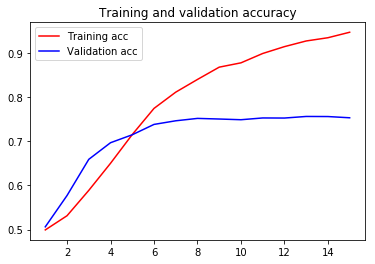

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

- Plotting **training** and **validation loss against epochs.**.

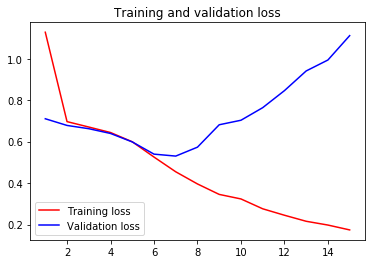

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
# Saving model
model.save('weights/1d_cnn_gru.h5')

<a id=section4></a>
## 4. Conclusion

<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/cnn_vs_rnn.png"/></center>

<br> 

Here’s what you should take away from this section:

- In the same way that 2D convnets perform well for processing **visual patterns** in 2D space, 1D convnets perform well for processing **temporal patterns**. 


- They offer a **faster** alternative to RNNs on some problems, in particular natural language processing tasks.


- Typically, 1D convnets are structured much like their 2D equivalents from the world of computer vision: 

  - They consist of **stacks** of **Conv1D** layers and **Max-Pooling1D** layers
  - Ending in a **global pooling** operation or **flattening** operation.


- Because RNNs are extremely **expensive** for processing very **long sequences**, but 1D convnets are **cheap**:
  - It can be a good idea to use a **1D convnet** as a **preprocessing** step before an **RNN**.
  - **Shortening** the **sequence** and **extracting** useful **representations** for the RNN to process.